In [1]:
import pandas as pd

# To do linear algebra
import numpy as np

# To create plots
import matplotlib.pyplot as plt
import seaborn as sns
# To create interactive plots
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import plotly.graph_objects as go

# To shift lists
from collections import deque

In [3]:
!pip install numpy

In [5]:
# Load data for all movies
movie_titles = pd.read_csv(r'movie_titles.csv')

print(f'Shape Movie-Titles:\t{movie_titles.shape}')
movie_titles.head()

Shape Movie-Titles:	(17770, 4)


,Unnamed: 0,movie_id,year,name
0,0,1,2003.0,Dinosaur Planet
1,1,2,2004.0,Isle of Man TT 2004 Review
2,2,3,1997.0,Character
3,3,4,1994.0,Paula Abdul's Get Up & Dance
4,4,5,2004.0,The Rise and Fall of ECW


In [7]:
# Load data for all movies
df = pd.read_csv(r'df_avgRating_with_usersCount.csv')

print(f'Shape Movie-Titles:\t{df.shape}')
df.head()

Shape Movie-Titles:	(4499, 3)


,movie_id,rating,user_id
0,1,3.749543,547
1,2,3.558621,145
2,3,3.641153,2012
3,4,2.739437,142
4,5,3.919298,1140


In [8]:
movie_titles.drop('Unnamed: 0', inplace= True, axis= 1)
movie_titles

,movie_id,year,name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [9]:
df.rename(columns = {'user_id':'users_count'}, inplace = True)
df.head()

,movie_id,rating,users_count
0,1,3.749543,547
1,2,3.558621,145
2,3,3.641153,2012
3,4,2.739437,142
4,5,3.919298,1140


In [10]:
df.isnull().sum()

movie_id       0
rating         0
users_count    0
dtype: int64

In [11]:
df.set_index('users_count').sort_index()

,movie_id,rating
users_count,,
36,4362,2.000000
39,4338,2.948718
42,3656,3.214286
43,915,2.837209
44,4294,4.272727
...,...,...
154832,571,3.962585
156183,4432,3.755364
160454,3860,3.434517


In [12]:
movie_titles.isnull().sum()

movie_id    0
year        0
name        0
dtype: int64

In [13]:
movie_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17770 entries, 0 to 17769
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   movie_id  17770 non-null  int64  
 1   year      17770 non-null  float64
 2   name      17770 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 416.6+ KB


In [14]:
def custom_rating(users,rating):
    if users<2000 and rating>4:
        return 0
    elif users>2000 and rating>4:
        return 1
    else:
        return 2
        
df['target'] = df.apply(lambda x: custom_rating(x['users_count'],x['rating']),axis=1)

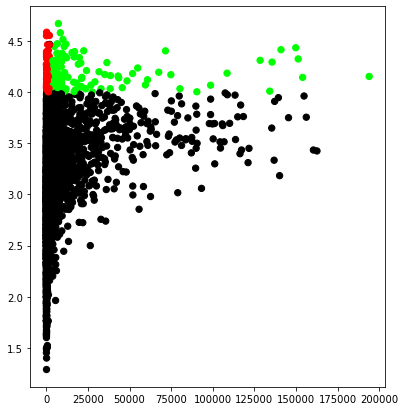

In [15]:
plt.figure(figsize=(14,7))
colormap = np.array(['red', 'lime', 'black','blue'])
plt.subplot(1, 2, 1)
plt.scatter(df.users_count,df.rating,c=colormap[df.target], s=40)

In [16]:
X=pd.DataFrame(df)
y=pd.DataFrame(df.target)

In [17]:
from sklearn.cluster import AgglomerativeClustering

H_clustering = AgglomerativeClustering(n_clusters=3)
H_clustering.fit(X)
predY = H_clustering.labels_
predY

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Text(0.5, 1.0, 'Hierarchical clustering')

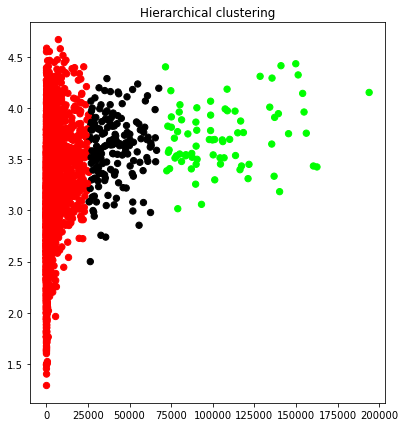

In [18]:
plt.figure(figsize=(14,7))
colormap = np.array(['red', 'lime', 'black','blue'])
plt.subplot(1, 2, 2)
predY = H_clustering.labels_
#predY = np.choose(predY, [1, 0, 2]).astype(np.int64)
plt.scatter(df.users_count, df.rating, c=colormap[predY], s=40)
plt.title('Hierarchical clustering')

In [19]:
import sklearn.metrics as sm
#Calculate Accuracy
sm.accuracy_score(y, predY)

0.05979106468104023

In [20]:
#Show the confusin Matrix
sm.confusion_matrix(y, predY)

array([[ 110,    0,    0],
       [ 112,   14,   18],
       [4037,   63,  145]], dtype=int64)

In [21]:
# Show Precision
sm.precision_score(y, predY, average=None)

array([0.02582766, 0.18181818, 0.88957055])

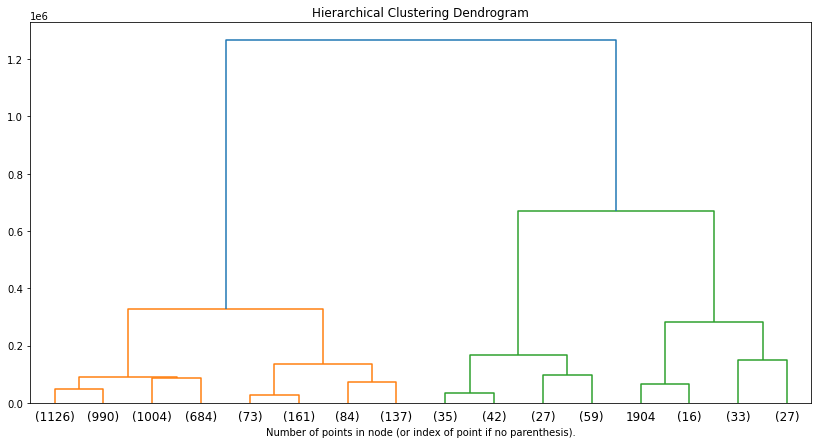

In [22]:
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(H_clustering.children_.shape[0])
    n_samples = len(H_clustering.labels_)
    for i, merge in enumerate(H_clustering.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [H_clustering.children_, H_clustering.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
plt.figure(figsize=(14,7))    
H_clustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
H_clustering = H_clustering.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(H_clustering, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [23]:
!pip install wordcloud

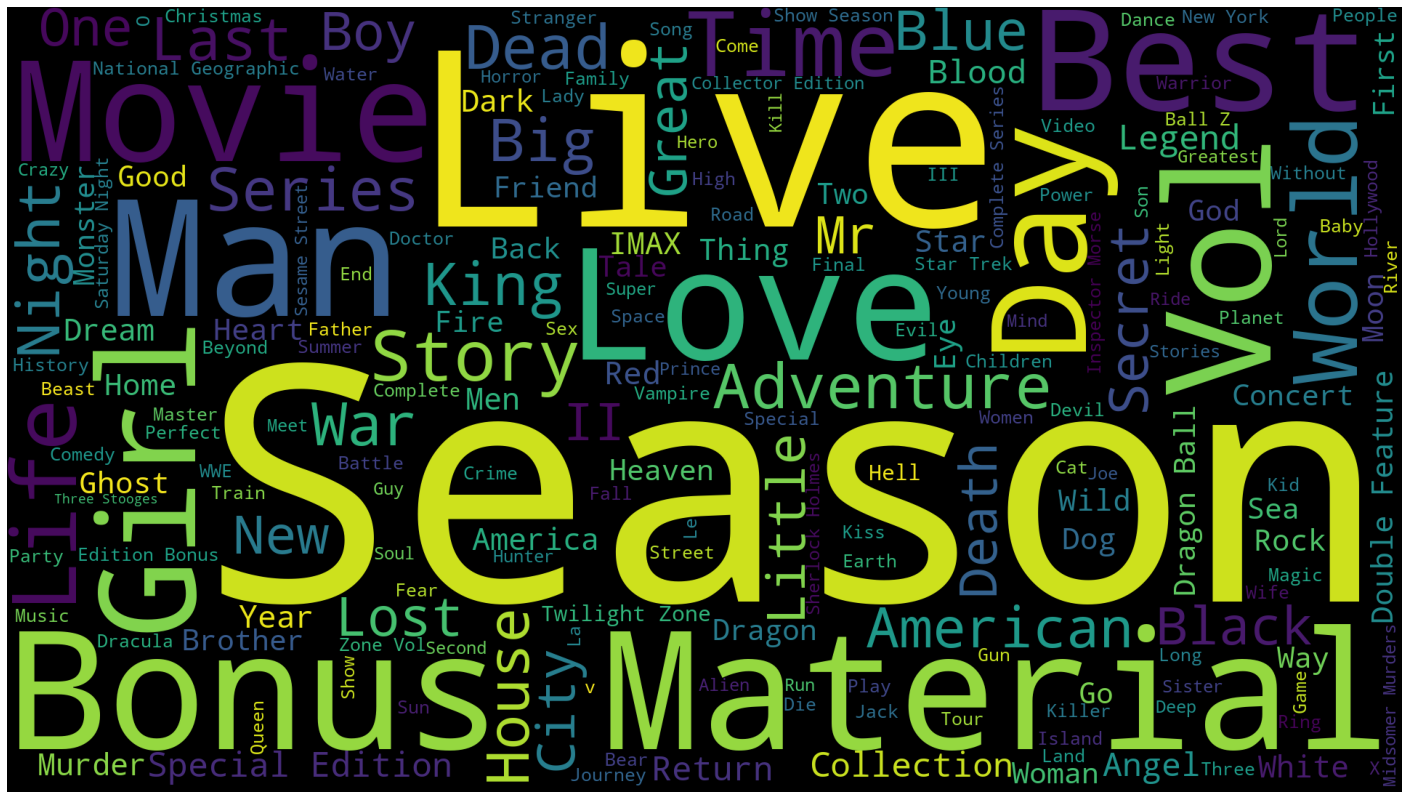

In [24]:
from wordcloud import WordCloud

plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='Black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(movie_titles.name))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('cast.png')
plt.show()

In [25]:
#Importing the modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [26]:
#Create arrays that resemble two variables in a dataset
x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

In [27]:
#Turn the data into a set of points:
data = list(zip(x, y))
print(data)

[(4, 21), (5, 19), (10, 24), (4, 17), (3, 16), (11, 25), (14, 24), (6, 22), (10, 21), (12, 21)]


In [28]:
#Compute the linkage between all of the different points.
#Here we use a simple euclidean distance measure and Ward's linkage, which seeks to minimize the variance between clusters.
linkage_data = linkage(data, method='ward', metric='euclidean')

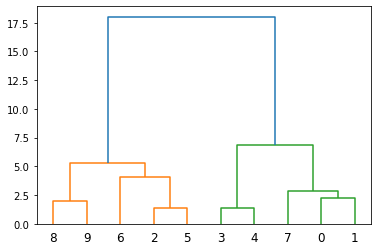

In [29]:
#plt.show() visualize the dendrogram instead of just the raw linkage data.

dendrogram(linkage_data)
plt.show()

In [30]:
#The scikit-learn library allows us to use hierarchichal clustering in a different manner.

# we initialize the AgglomerativeClustering class with 2 clusters, using the same euclidean distance and Ward linkage.

hierarchical_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

In [31]:
#The .fit_predict method can be called on  data to compute the clusters using the defined parameters across our chosen number of clusters.

labels = hierarchical_cluster.fit_predict(data) 
print(labels)

[0 0 1 0 0 1 1 0 1 1]


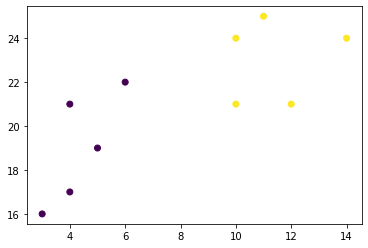

In [32]:
#plot the same data and color the points using the labels assigned to each index by the hierarchical clustering method
plt.scatter(x, y, c=labels)
plt.show()

# Text analysis using topic modeling algorithms

Topic Modeling in Python: Latent Dirichlet Allocation (LDA)

Topic Models, in a nutshell, are a type of statistical language models used for uncovering hidden structure in a collection of texts.

In [33]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [53]:
papers=pd.read_csv(r'papers.csv')
papers.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [54]:
#Cleaning
papers = papers.drop(columns=['id', 'event_type', 'pdf_name'], axis=1).sample(100)

# Print out the first rows of papers
papers.head()

,year,title,abstract,paper_text
104,1995,Clustering data through an analogy to the Pott...,Abstract Missing,Clustering data through an analogy to\nthe Pot...
2536,1990,The Recurrent Cascade-Correlation Architecture,Abstract Missing,The Recurrent Cascade-Correlation Architecture...
3751,2011,A Global Structural EM Algorithm for a Model o...,Cancer has complex patterns of progression tha...,A Global Structural EM Algorithm\nfor a Model ...
1004,2000,A Variational Mean-Field Theory for Sigmoidal ...,Abstract Missing,A variational mean-field theory for\nsigmoidal...
572,1998,An Entropic Estimator for Structure Discovery,Abstract Missing,An entropic estimator for structure discovery\...


In [55]:
import re

#remove punctuation
papers['paper_text_processed'] = \
papers['paper_text'].map(lambda x: re.sub('[,\.!?]','',x))

In [56]:
#convert to lower case and print first rows
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())
papers['paper_text_processed'].head()

104     clustering data through an analogy to\nthe pot...
2536    the recurrent cascade-correlation architecture...
3751    a global structural em algorithm\nfor a model ...
1004    a variational mean-field theory for\nsigmoidal...
572     an entropic estimator for structure discovery\...
Name: paper_text_processed, dtype: object

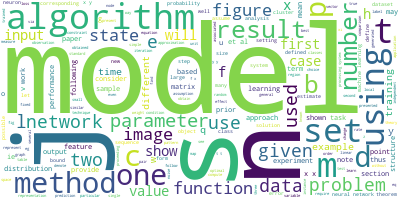

In [57]:
#Exploratory Analysis:
# To verify the preprocessing we use a word cloud 
from wordcloud import WordCloud
long_string = ','.join(list(papers['paper_text_processed'].values))
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [58]:
#Prepare text for LDA
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [59]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [60]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]


data = papers.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))

In [61]:
# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

['clustering', 'data', 'analogy', 'potts', 'model', 'marcelo', 'blatt', 'shai', 'wiseman', 'eytan', 'domany', 'department', 'physics', 'complex', 'systems', 'weizmann', 'institute', 'science', 'rehovot', 'israel', 'abstract', 'new', 'approach', 'clustering', 'proposed', 'method', 'based', 'analogy', 'physical', 'model']


In [62]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 4), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1), (14, 3), (15, 2), (16, 7), (17, 1), (18, 1), (19, 4), (20, 1), (21, 2), (22, 6), (23, 2), (24, 2), (25, 2), (26, 1), (27, 1), (28, 2), (29, 1)]


In [63]:
#LDA Model Training
from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.007*"model" + 0.005*"learning" + 0.004*"using" + 0.004*"one" + '
  '0.004*"distribution" + 0.004*"data" + 0.004*"set" + 0.004*"algorithm" + '
  '0.003*"problem" + 0.003*"number"'),
 (1,
  '0.005*"model" + 0.005*"learning" + 0.005*"one" + 0.004*"algorithm" + '
  '0.004*"distribution" + 0.004*"set" + 0.004*"data" + 0.003*"figure" + '
  '0.003*"using" + 0.003*"two"'),
 (2,
  '0.007*"model" + 0.005*"using" + 0.005*"learning" + 0.004*"set" + '
  '0.004*"data" + 0.003*"one" + 0.003*"information" + 0.003*"also" + '
  '0.003*"figure" + 0.003*"state"'),
 (3,
  '0.006*"set" + 0.005*"model" + 0.004*"function" + 0.004*"data" + '
  '0.004*"algorithm" + 0.004*"using" + 0.004*"information" + 0.003*"figure" + '
  '0.003*"learning" + 0.003*"one"'),
 (4,
  '0.007*"model" + 0.005*"learning" + 0.005*"set" + 0.004*"data" + '
  '0.003*"training" + 0.003*"algorithm" + 0.003*"number" + 0.003*"two" + '
  '0.003*"one" + 0.003*"problem"'),
 (5,
  '0.005*"learning" + 0.005*"model" + 0.004*"data" + 0.004

In [64]:
pip install pyLDAvis

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136882 sha256=f22733765ede2b7f0cf896d5a60b4c7644b57f0ce977c972fda420d01b793903
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\57\a4\86\d10c6c2e0bf149fbc0afb0aa5a6528ac35b30a133a0270c477
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=8e12f7025f09e72a5eb79d8e4bbf14cc2c3afada8bc49bd1426a586ae8bc08fd
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\e4\7b\98\b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successful

In [65]:
#import pyLDAvis.gensim
import pickle 
import pyLDAvis
import pyLDAvis.gensim_models

In [66]:
# Visualize the topics
#pyLDAvis.enable_notebook()

#LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
#/**
#if 1 == 1:
#    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
#    with open(LDAvis_data_filepath, 'wb') as f:
#        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
#with open(LDAvis_data_filepath, 'rb') as f:
#    LDAvis_prepared = pickle.load(f)

#pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
#LDAvis_prepared

In [67]:
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
LDAvis_prepared

C:\Users\Lenovo\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.000309 -0.009107       1        1  18.199635
8      0.008305 -0.001600       2        1  16.055736
0      0.003524  0.006095       3        1  13.458270
1     -0.000560  0.002020       4        1   9.391143
4      0.002711 -0.002493       5        1   8.988790
7      0.000391  0.000939       6        1   8.865753
5     -0.001663  0.003468       7        1   7.774361
3     -0.003594  0.001135       8        1   6.680144
6     -0.000989  0.000411       9        1   5.477091
2     -0.007816 -0.000866      10        1   5.109078, topic_info=             Term         Freq        Total Category  logprob  loglift
381         model  1440.000000  1440.000000  Default  30.0000  30.0000
533           set  1120.000000  1120.000000  Default  29.0000  29.0000
296   information   612.000000   612.000000  Default  28.0000  28.0000
241      function   671.000000   671.000000  Default  27.0000  27.0000
651         using   889.000000   889.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
864         error    23.249500   505.957884  Topic10  -6.2655  -0.1060
1011      network    24.123105   554.995561  Topic10  -6.2286  -0.1616
241      function    25.763794   671.066493  Topic10  -6.1628  -0.2857
2303       matrix    23.522837   573.318836  Topic10  -6.2538  -0.2193
1201     training    24.438354   669.789238  Topic10  -6.2156  -0.3367

[875 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
3126       1  0.348238  actions
3126       2  0.097942  actions
3126       3  0.108824  actions
3126       4  0.065295  actions
3126       5  0.087060  actions
...      ...       ...      ...
12940      6  0.102058      znk
12940      7  0.068039      znk
12940      8  0.034019      znk
12940      9  0.051029      znk
12940     10  0.034019      znk

[4085 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 9, 1, 2, 5, 8, 6, 4, 7, 3])